# PROBLEM STATEMENT


An ice cream shop and want to develop a model that forecasts daily revenue in dollars based on the outside temperature (°C).
We are going to implement a basic Artificial Neural Network.

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars




<table>
  <tr><td>
    <img src="https://globalnews.ca/wp-content/uploads/2022/08/ketchup-mustard-ice-cream-cne-e1659540719527.png?w=720"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://globalnews.ca/wp-content/uploads/2022/08/ketchup-mustard-ice-cream-cne-e1659540719527.png?w=720]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [ ]:
!pip3 install --upgrade pip
!pip3 install tensorflow==2.15.0

In [2]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

## import CSV file entitled "SalesData.csv"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TensorFlow/SalesData.csv')

In [5]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
sales_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

<Axes: xlabel='Temperature', ylabel='Revenue'>

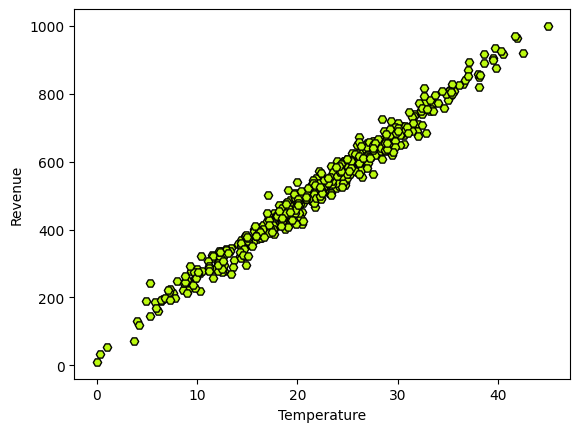

In [ ]:
sns.scatterplot(data=sales_df, x="Temperature", y='Revenue', marker="H",edgecolor="black", linewidth=1, facecolor="#BBF90F")

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [7]:

X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [8]:
X_train.shape

(500,)

In [9]:
Y_train.shape

(500,)

# STEP#4: BUILD AND TRAIN THE MODEL

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [14]:
epoch_hist = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 218029.5625
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19088.6816
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6106.7798   
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1632.0146  
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 816.1180 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 628.2658  
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 619.1023 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 656.2199 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 618.4033  
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 620.4738 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 668.2810 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 645.7760 
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 627.0644 
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 650.2606 
Epoch 15/200
16/16

# STEP#5: EVALUATE THE MODEL

In [15]:
epoch_hist.history.keys()

dict_keys(['loss'])

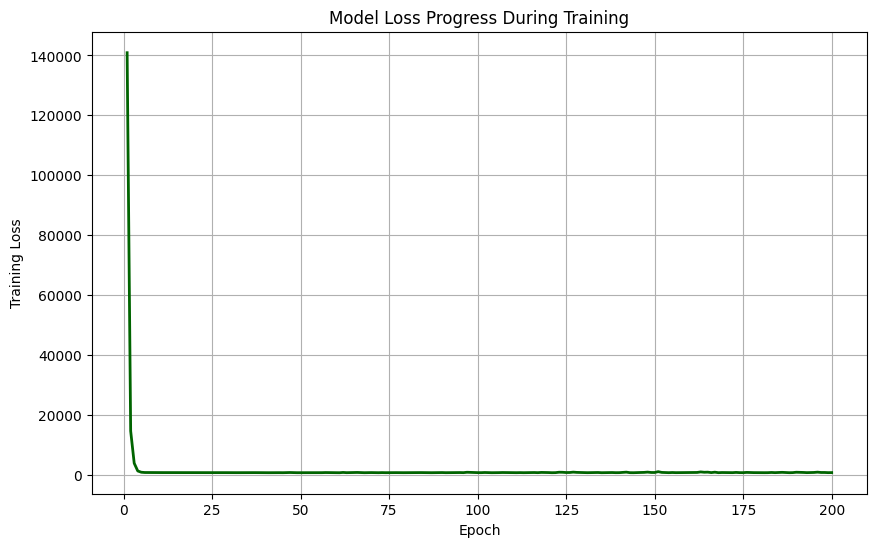

In [16]:

epochs = range(1, len(epoch_hist.history['loss']) + 1)
train_loss = epoch_hist.history['loss']

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, color='darkgreen', linestyle='-', linewidth=2)

plt.grid(True)

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

plt.show()


In [17]:
model.get_weights()

[array([[ 1.1779333 ,  0.99078894, -2.2920477 ,  1.1682322 ,  0.8032885 ,
         -0.00580046,  1.8212773 , -1.5451733 , -0.04022072,  2.4375937 ]],
       dtype=float32),
 array([ 3.089042 ,  2.6058092, -3.6843338,  3.07008  ,  2.7680361,
         0.1460806,  3.5028927, -3.3483253,  1.0343659,  3.683006 ],
       dtype=float32),
 array([[ 1.2672564e+00],
        [ 1.0606877e+00],
        [-2.2031279e+00],
        [ 1.2727132e+00],
        [ 8.5485893e-01],
        [ 1.9815273e-04],
        [ 1.8780131e+00],
        [-1.5365041e+00],
        [ 2.1532313e-03],
        [ 2.5692348e+00]], dtype=float32),
 array([3.466436], dtype=float32)]

# Use the trained model to perform predictions

In [20]:
Temp = np.array([[32]])
Revenue = model.predict([Temp])
print('Revenue predictions using trained ANN = ', Revenue)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Revenue predictions using trained ANN =  [[744.0939]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


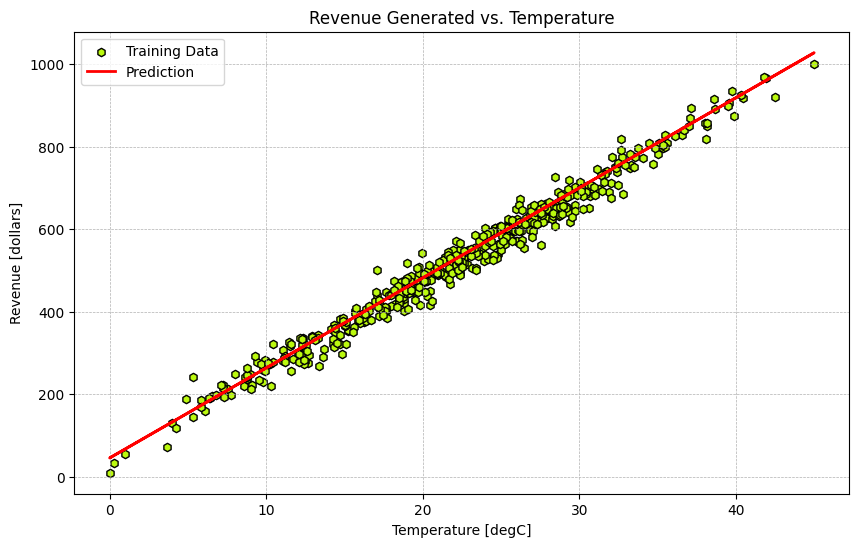

In [21]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train, Y_train,marker='h', edgecolors='black',color='#BBF90F', label='Training Data')

plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Prediction')

plt.grid(True, linestyle='--', linewidth=0.5)

plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')

plt.legend()

plt.show()

# STEP #6 CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

Reshape the training data

In [22]:
X_train = X_train.values.reshape(-1,1)

In [23]:
X_train.shape

(500, 1)

In [24]:
Y_train = Y_train.values.reshape(-1,1)

In [25]:
Y_train.shape

(500, 1)

In [26]:
from sklearn.linear_model import LinearRegression


Create the linear regresion Model

In [27]:
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

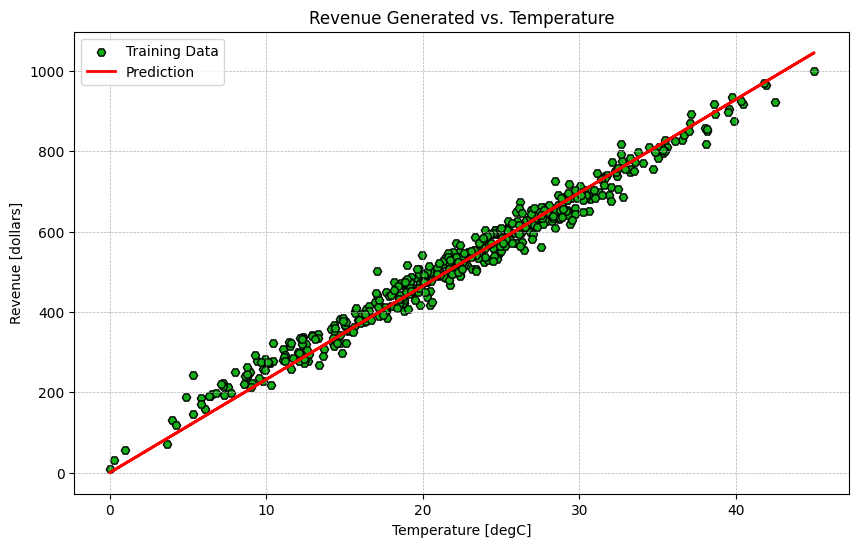

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train, Y_train, marker='H', edgecolors='black', color='#15B01A', label='Training Data')

plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Prediction')


plt.grid(True, linestyle='--', linewidth=0.5)

plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')

plt.legend()

plt.show()

